In [1]:
import os
import sys

os.getcwd()
# Change the current working directory to one dir above
# os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()


'c:\\Users\\giorg\\OneDrive\\Έγγραφα\\Σχολή\\Πτυχιακή\\ADBOD'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from numpy import ndarray as NDArray
import pandas as pd
import random
from Techniques import dynamic
import time
from tqdm import tqdm
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from prts import ts_recall, ts_precision
# from TSB_UAD_code.feature import Window

from Techniques.dynamic import dynamic_kr
# from TSB_UAD_code.slidingWindows import find_length
# from sklearn.preprocessing import MinMaxScaler

import tsfel
import variables
from my_experiment import Experiment


In [14]:
z1 = list(d / 2 for d in range(4, 20))

df = pd.DataFrame()
# Add 5 columns to the dataframe --> dataset, time, recall, precision, f1
df['dataset'] = ''
df['time'] = ''
df['recall'] = ''
df['precision'] = ''
df['f1'] = ''

# Test the Yahoo dataset with the selected z values
for dataset in variables.datasets:
    times_original, recalls_original, precisions_original, f1s_original = Experiment.test_dataset(dataset_root_name=dataset, mode='z', slide=100, window=200, z=z1)

    for i in range(len(times_original)):
        df = pd.concat([df, pd.DataFrame({'dataset': [f'{dataset}'], 'time': [times_original[i]], 'recall': [recalls_original[i]], 'precision': [precisions_original[i]], 'f1': [f1s_original[i]]})], ignore_index=True)




100%|██████████| 100/100 [00:12<00:00,  8.28it/s]


In [15]:
df.head(-1)

,dataset,time,recall,precision,f1
0,./data/YAHOO/Yahoo_A1real_,0.137691,0.500000,0.083333,0.142857
1,./data/YAHOO/Yahoo_A1real_,0.135514,0.062500,0.055556,0.058824
2,./data/YAHOO/Yahoo_A1real_,0.091561,0.133333,0.181818,0.153846
3,./data/YAHOO/Yahoo_A1real_,0.132491,0.600000,0.230769,0.333333
4,./data/YAHOO/Yahoo_A1real_,0.120018,0.500000,0.100000,0.166667
...,...,...,...,...,...
358,./data/YAHOO/YahooA4Benchmark-TS,0.104858,0.307692,0.222222,0.258065
359,./data/YAHOO/YahooA4Benchmark-TS,0.101684,0.200000,0.071429,0.105263
360,./data/YAHOO/YahooA4Benchmark-TS,0.099763,0.500000,0.071429,0.125000
361,./data/YAHOO/YahooA4Benchmark-TS,0.123523,0.375000,0.400000,0.387097


In [ ]:
# Get the mean time and f1 score for each dataset
df = pd.read_csv('original_results.csv')
print(df.groupby('dataset')['f1'].mean())

dataset
./data/YAHOO/YahooA3Benchmark-TS    0.367472
./data/YAHOO/YahooA4Benchmark-TS    0.313298
./data/YAHOO/Yahoo_A1real_          0.181545
./data/YAHOO/Yahoo_A2synthetic_     0.359666
Name: f1, dtype: float64
['./data/YAHOO/Yahoo_A1real_', './data/YAHOO/Yahoo_A2synthetic_', './data/YAHOO/YahooA3Benchmark-TS', './data/YAHOO/YahooA4Benchmark-TS']


In [20]:
# Save the results to a csv file
df.to_csv('original_results.csv', index=False)

In [ ]:
# z1 = list(d / 2 for d in range(4, 20))
z2 = list(d / 2 for d in range(4, 12))
# k1 = [5,6,7,8,9,10,13,17,21,30,40]
k2 = [5,8, 13, 21, 30]

df = pd.read_csv('original_results.csv')
speedups = []
f1s = []
# Test the Yahoo dataset with the selected z values
for dataset in variables.datasets:
    times_half, _, _, f1s_half = Experiment.test_dataset(dataset_root_name=dataset, mode='z', slide=100, window=200, z=z2)

    # Calculate speedup
    speedup = np.sum(times_original) / np.sum(times_half)
    # Mean f1 score
    speedups.append(speedup)
    f1s.append(np.mean(f1s_half))

    print(f'Dataset: {dataset}, Original F1: {np.mean(f1s_original)}, Half F1: {np.mean(f1s_half)}, Speedup: {speedup}')



100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


Dataset: ./data/YAHOO/Yahoo_A1real_, Original F1: 0.1815451391168642, Half F1: 0.19296676945815883, Speedup: 1.3371071134832144


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


Dataset: ./data/YAHOO/Yahoo_A2synthetic_, Original F1: 0.35966572173122063, Half F1: 0.3223598087058345, Speedup: 1.2477456251788377


100%|██████████| 100/100 [00:10<00:00,  9.27it/s]


Dataset: ./data/YAHOO/YahooA3Benchmark-TS, Original F1: 0.36747245545181595, Half F1: 0.360629519189596, Speedup: 1.2054897627821104


100%|██████████| 100/100 [00:10<00:00,  9.73it/s]

Dataset: ./data/YAHOO/YahooA4Benchmark-TS, Original F1: 0.31329769587276046, Half F1: 0.2958599042921132, Speedup: 1.1984343908121413


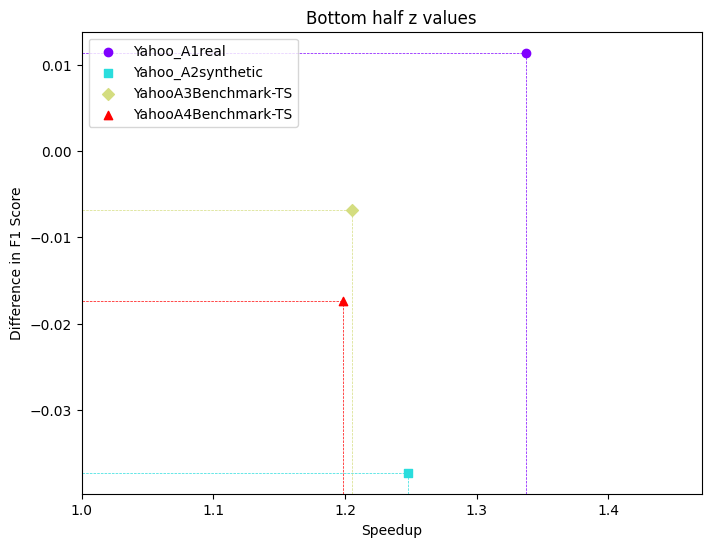

In [21]:
f1_diff = [f1 - true_f1 for f1, true_f1 in zip(f1s, true_f1s)]

plt.figure(figsize=(8, 6))
plt.xlabel('Speedup')
plt.ylabel('Difference in F1 Score')

plt.xlim(1, max(speedups) * 1.1)

markers = ['o', 's', 'D', '^', 'v', '*', 'p', 'X', '<', '>']
colors = plt.cm.rainbow(np.linspace(0, 1, len(variables.dataset_names)))

# Plot scatter points
for i, dataset in enumerate(variables.dataset_names):
    plt.scatter(speedups[i], f1_diff[i], color=colors[i], label=dataset, marker=markers[i % len(markers)])

# Fetch updated y-limits after scatter plot
y_min, y_max = plt.ylim()

# Add vertical and horizontal dashed lines
for i, dataset in enumerate(variables.dataset_names):
    plt.axhline(y=f1_diff[i], color=colors[i], linestyle='--', linewidth=0.5, 
                xmax=(speedups[i] - 1) / (plt.xlim()[1] - 1))
    plt.axvline(x=speedups[i], color=colors[i], linestyle='--', linewidth=0.5, 
                ymax=(f1_diff[i] - y_min) / (y_max - y_min))

plt.legend()
plt.title('Bottom half z values')
plt.show()